# Assignment-1: Data Visualization with Haberman Dataset

# Exercise Given:
1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to download data.     (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
3. High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4. Explain our objective.
5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7. Write your observations in english as crisply and unambigously as possible. Always quantify your results.

# 1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to download data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)

In [62]:
# 1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into pandas DataFrame
haberman=pd.read_csv('haberman.csv')
h=haberman.head()
print('starting few rows are: \n',h)
t=haberman.tail()
print('\nlast few rows are: \n',t)

starting few rows are: 
    age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1

last few rows are: 
      age  year  nodes  status
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2


# 2. Perform a similar alanlaysis as above on this dataset with the following sections:

# 3 High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [2]:
print("total nimber of rows and colums are:\n",haberman.shape) # how many data points and feature ?

print("\n column names are:\n",haberman.columns) # what are the column names in the data set

print( "\n number of data points in age column: \n", haberman['status'].value_counts() )

print('\n number od data points in year column: \n', haberman['age'].value_counts())

print('\n description of dataset: \n', haberman.describe())

total nimber of rows and colums are:
 (306, 4)

 column names are:
 Index(['age', 'year', 'nodes', 'status'], dtype='object')

 number of data points in age column: 
 1    225
2     81
Name: status, dtype: int64

 number od data points in year column: 
 52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

 description of dataset: 
               age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.00

# 4. Explaination of the Objective

objective : To analyse the survival of the patients who had undergone surgery of breast cancer

explaination : Columns of data set are 'age', 'year', 'node' and 'status'. 
 
 1) 'age' column indicates the age of the patients who has udergone surgery at that particular age
 
 2) 'year' column indicates the year in which patients have undergone for surgery
 
 3) 'node' column indicates the number of nodes present in blood sample during surgery
 
 4) 'status' column indicates survival of patient after surgery for equal or more than 5years if status=1, else if patient died before 5 years than status=2
 
 *Based on these columns we need to analyse each variable and relationship between the variables which indicates the factors that are responsible for status of patient i.e if patient survived more than  5 years or less than 5 years

# 5. Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification

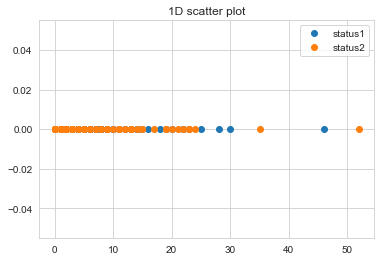

In [22]:
# Univariate analysis(1D Scatter plot)
import numpy as np
haberman_status1=haberman.loc[haberman['status']==1]
haberman_status2=haberman.loc[haberman['status']==2]

#print (habermn_status['status'])
plt.plot(haberman_status1['nodes'], np.zeros_like(haberman_status1['nodes']),'o', label='status1')
plt.plot(haberman_status2['nodes'], np.zeros_like(haberman_status2['nodes']), 'o', label='status2')
plt.title('1D scatter plot')
plt.legend()
plt.show()

# observations :
1) blue dots indicate patients who had survied for more than or equal to 5 years, which are less in count according to above plot

2) orange dots indicate patiens died within 5 years, which are observed more

3) plot is drawn considering number of nodes present in patient during operation

4) not survived orange dots are overlapping on blue survived dots

5) accoding plot people who had nodes between 0 to 28(approx) have died more than who survived for equal t or more than 5 years

6) plot is not usefull much as readings are overlapping


* Histogram, PDF Analysis

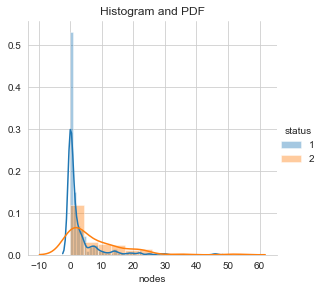

In [27]:
# Univariate analysis (histogram, PDF)
#based on node
sns.FacetGrid(haberman, hue='status', height=4)\
    .map(sns.distplot,"nodes")\
    .add_legend()
plt.title('Histogram and PDF')
plt.show()


# observations:
1) plot is plotted considering the two status values, status=1 which indicates survival for equal or more than five years after surgery, status=2 which indicates patients died before 5 years after surgery

2) for density here nodes feature is considered

3) from plot it is observed that for zero(0) nodes status1 is high i.e patients who had zero nodes survived more.

4) patients who have nodes more than 10 20 or 30, didnt survive for 5 years

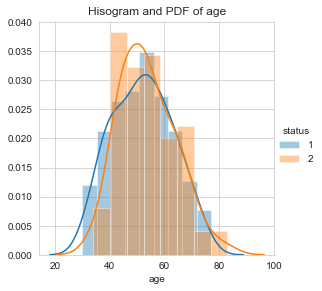

In [29]:
# Histogram, PDF analysis
# based on age

sns.FacetGrid(haberman, hue='status', height=4) \
    .map(sns.distplot, 'age') \
    .add_legend()
plt.title('Hisogram and PDF of age')
plt.show()

# observation:
1) plot is drawn for two statuses, status1=survival for 5 or more, status2=survival below 5 years

2) for density 'age' is considered

3) from plot we can see for all ages status1 and status2 are almost overlapped, so plot is not much of help for analysis

4) people whose age is between 30 to 70 have survived. age between 57 to 60 have more survival rate i.e status=1

5) peole who have age between 35 to 85 have not survived takes status2 density, patients of age 39 to 45 age have died more.

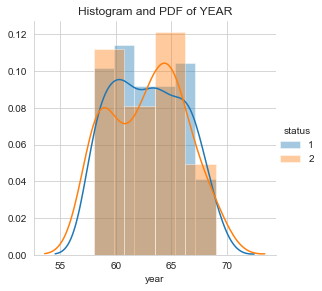

In [31]:
# Univariate Analysis(histogram, pdf)
# Based on Year

sns.FacetGrid(haberman, hue='status', height=4)\
    .map(sns.distplot, 'year')\
    .add_legend()
plt.title('Histogram and PDF of YEAR')
plt.show()

# Observation
1) for all years patient survival and not survival are overlapped i.e plot is not of much help for analysis

2) more Patients survived between the years 58 to 62

3) more patients died between the years 63 to 67

* CDF analysis

pdf: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]

bin_edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


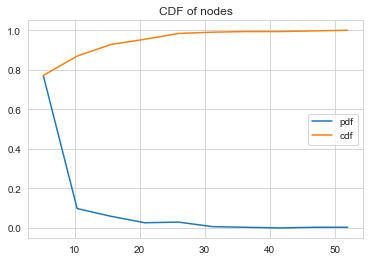

In [40]:
# CDF of 'Nodes'

counts, bin_edges=np.histogram(haberman['nodes'], bins=10, density=True)

pdf=counts/sum(counts)
print('pdf:',pdf)
print('\nbin_edges:',bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf')
plt.plot(bin_edges[1:],cdf, label='cdf')
plt.legend()
plt.title('CDF of nodes')
plt.show()


# Observations:
1) x asis indicates number of nodes, y axis indicate percentage of survival

2) blue color plot indicates survival for or more than 5 years, orange colour indicated died within 5 years.

2) if nodes are between 0 to 10, survival is higher upto 80%

3) if nodes start increasing survival status starts decreasing

4) if nodes are between 10 to 20. survival status is 10% and decreasing

5) if nodes are above 30 percent survival 

6) Plot is useful. 

pdf of status1: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

bin_edges of status1: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

bin_edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


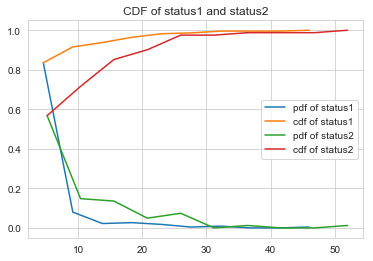

In [41]:
# Cdf of nodes for two different status i. e 1, 2

#status 1
counts, bin_edges=np.histogram(haberman_status1['nodes'], bins=10, density=True)

pdf=counts/sum(counts)
print('pdf of status1:', pdf)
print('\nbin_edges of status1:', bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of status1')
plt.plot(bin_edges[1:],cdf, label='cdf of status1')

plt.legend()

#status 2
counts,bin_edges=np.histogram(haberman_status2['nodes'], bins=10, density=True)

pdf=counts/sum(counts)
print('pdf:',pdf)
print('\nbin_edges:',bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf of status2')
plt.plot(bin_edges[1:],cdf, label='cdf of status2')
plt.legend()

plt.title('CDF of status1 and status2')
plt.show()


# observation

1) status 1: survival for or more than 5 years remains same : * if nodes are 0 to 5, survival is higher upto 80%

                                                * if nodes start increasing survival status starts decreasing

                                                * if nodes are between 10 to 20. survival status is 10% and decreasing
                                                
2) status 2: survival less than 5 years:1) if nodes are between 0 to 5 survival is upto 57%

                        2) if nodes are more than 35 then people died before 5 years are 100%


In [9]:
# Mean, Variance and std_dev

print('mean value')

print(np.mean(haberman_status1['nodes']))
print(np.mean(haberman_status2['nodes']))

print('\nstandard deviation')
print(np.std(haberman_status1['nodes']))
print(np.std(haberman_status2['nodes']))

mean value
2.7911111111111113
7.45679012345679

standard deviation
5.857258449412131
9.128776076761632


In [10]:
# Median, Quantiles, percentiles and IQR

print('\nmedian')
print(np.median(haberman_status1['nodes']))
print(np.median(haberman_status2['nodes']))

print('\nQuantiles')
print(np.percentile(haberman_status1['nodes'],np.arange(0,100,25)))
print(np.percentile(haberman_status2['nodes'],np.arange(0,100,25)))

print('\n90th percentile')
print(np.percentile(haberman_status1['nodes'],90))
print(np.percentile(haberman_status2['nodes'],90))

print('\nmedian absolute Deviation')
from statsmodels import robust
print(robust.mad(haberman_status1['nodes']))
print(robust.mad(haberman_status2['nodes']))


median
0.0
4.0

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile
8.0
20.0

median absolute Deviation
0.0
5.930408874022408


# Box Plot and Whiskers

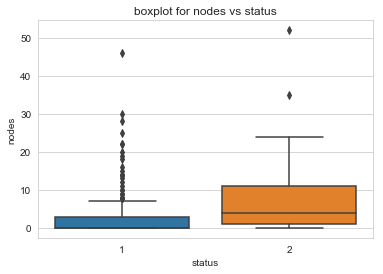

In [42]:
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('boxplot for nodes vs status')
plt.show()

# observation :
1) for status 1, for or more than 5 yeras survival, the 25th percetile and 50th percentile are same.

    *survival of 25th to 75th percentile is possible if nodes are between 0 to 5
    
    * 100 percentile survival is possible if nodes are below 8, still status 2 has also have values associated those nodes.    which leads to error.

2) for status 2, patient died within 5 years, the 25th to 75th percentile is possible for nodes 0 to 12,
    * 25th percentile people die if nodes are 0 to 2
    
    * 75th percentile people die if nodes are 10 to 12
    
    * 100 percentie people die if nodes are more than 25
    
Sumary: 1) status 1 and status 2 plots merge if nodes are between 0 to 8.
        
        2) 50% of values are have equal nodes for status1 and status2 which leads to 50% error
        
        3) if nodes are above 10 patients fall under status 2, they die within 5 years
        
        4) 100 percentile patients will survive if nodes are below 8, with 50% error.
    

# violin plots

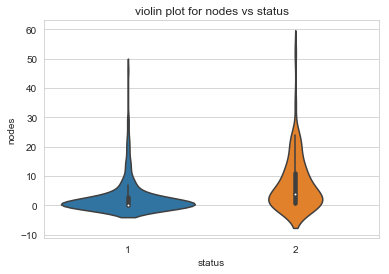

In [43]:
# voilin plot is combination of histogram, pdf and boxplot
sns.violinplot(x='status', y='nodes', data=haberman)
plt.title('violin plot for nodes vs status')
plt.show()

# Observations :

* violin plot gives the information of density as well as percentile as it is combines properties of histogram, pdf and boxplot

status 1 : survival of patients for or more than 5 years after the operation

    1) the density of survival is more if nodes are 0, survival density decreases as number of nodes increase
    
    2) the boxplot within indicates if nodea are 0 to 8 survival density is more
    
status 2 : patients survived less than 5 years after Operation

    1) Density is more from 0 to 25
    '
    2)100 percentile patients die who had nodes more than 25
    
Summary: 1) status1 25th and 50Th percentile have same value, i.e 50% patients survive if they have zero nodes, 75% patients survive if nodes are between 0 to 8

    2) 50%  to 75% patients survive less if they have nodes 0 to 8.. which leads to 50% error
    
    3) 50% values are same for status 1 and 2 which causes 50% error


# 6. Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classification.

# 2-D Scatter Plot

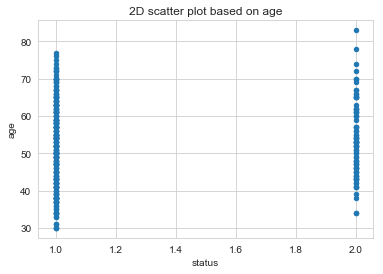

In [44]:
# 2D Scatter Plot 
# based on age
haberman.plot(kind='scatter', x='status', y='age')
plt.title('2D scatter plot based on age')
plt.show()

# Observatins :

for status 1 and status 2, almost points fall in same range age 35 to 75, we can't make any much analysis based on age

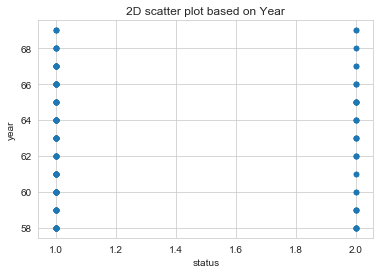

In [45]:
# 2D Scater plot based on Year
haberman.plot(kind='scatter', x='status', y='year')
plt.title('2D scatter plot based on Year')
plt.show()

# observations :

for status 1 and status 2 points fall in same range year 58 to 70, we can't analyse patients survival based on Year of operation

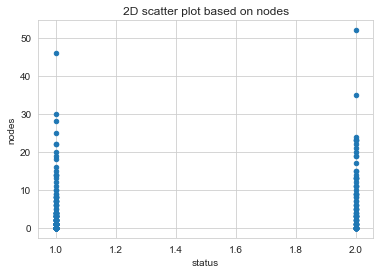

In [46]:
# 2-D scatter plot, based on 'nodes'

haberman.plot(kind='scatter', x='status', y='nodes')
plt.title('2D scatter plot based on nodes')
plt.show()

# Obervation : 
can't analyse much, plot is not useful

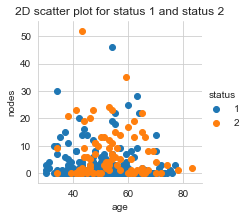

In [48]:
# 2-D scatter plot with color coding for each status

sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', height=3)\
    .map(plt.scatter, 'age', 'nodes')\
    .add_legend()
plt.title('2D scatter plot for status 1 and status 2')
plt.show()

# observation

1) blue dots indicate survival for or more than 5 yearsi.e status 1, orange dots indicate didn't survive for 5 years i.e status 2.

2) plot indicates number of nodes for different ages

# Pair Plot


Pair Plot


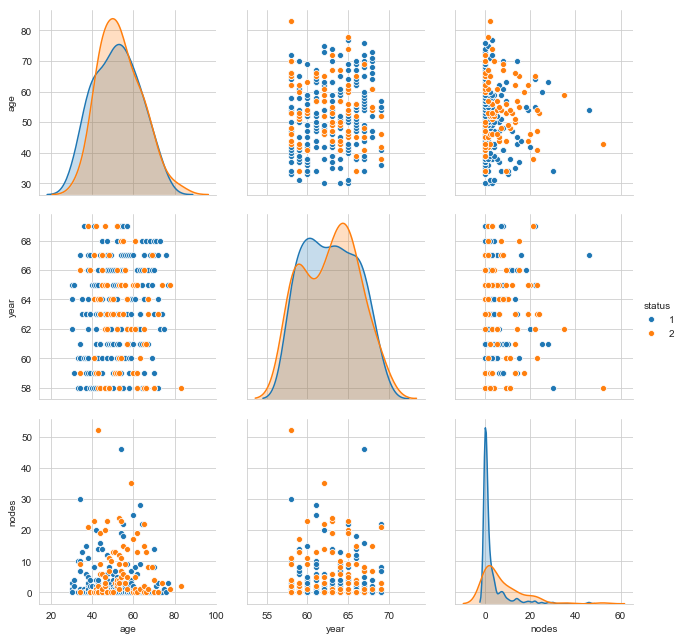

In [55]:
# Pair plot, 3 features 
plt.close()
sns.set_style('whitegrid')
print('\nPair Plot')
sns.pairplot(haberman, hue='status', height=3, vars=['age','year','nodes'])
plt.show()

# Observations:

1) Pair plot gives 9 plots. which are ploted considering 4 columns 'age', 'year'and 'nodes' for x axis as well as y axis considering status as output

2) plots 1, 5 and 9 indicates pdf of status 1(blue) and status 2(orange)

3) plot 2, is age vs year, can't distinguish points as they are overlapped. can't use it for analysis purpose

4) plot 3, is age vs nodes, there is no much overlapping, status 1 and status 2 points are distingishable but not precisely

5) plot 4,  is year vs age, same as plot 1

6) plot 6, is year vs nodes, many points are overlapped, can not analyse it

7) plot 7, is nodes vs age, same as plot 3

8) plot 8, node vs year, same as plot 7


summary: plot 3 or 7, age vs nodes have scatter points which are distinguishable.

# 7 Write your observations in english as crisply and unambigously as possible. Always quantify your results.


# Observations

1) Dataset Consists of 4 Variables, age, year,Node, Status.

2) Depending on number of nodes we can analyse the status. if nodes are above 30 or 35, patients have 100% chance of not surviving above 5 years.

3)If nodes in blood sample while unergoing operation are below 10, patients have 50% chance of surviving with 50% chance of not surviving for more than 5 years

4) age and year doesn't contribute much to analysis.